### Submitted by : Anushka and Yashasvee

### Answer 5 : Autocorrelation time τ for the absolute magnetization


This is only for part 5. Sorry for the confusion.

In [55]:
# Necessary modules

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as r
from random import choice
import sympy

# We now work to generalize the Ising model to 2-Dimensions and or that the lattice size becomes (N_x) X (N_y) where we 
# assume periodic boundary conditions in both, x and y, directions. It is given that we use the same coupling constant in
# both directions.

# Number of sweeps for thermalization for every value of J,h
n_therm = 20000

# Number of measurements for each J,h
n_meas = 100  

# External magnetic field
h = 0

In [56]:
#  Beginning by defining the two point correlation function

# Taken from the discussion in the tutorial

# This function returns the ft values and takes care of k and -k indices in the summation

def C(s):
    skp = np.fft.fft2(s, norm = 'backward')
    # print(skp)
    skm = np.fft.ifft2(s, norm = 'forward')
    return np.fft.fft2(skm*skp, norm = 'backward')/s.size**2

In [57]:
J_c = 0.44068 # Critical J

In [58]:
# To calculate change in energy after one spin flips at position (x,y)

# This is the general formula and we have already defined h=0 above
def energy_flip(s,J,h,x,y,n):
#     Here, the s is the spin, x and y are th positions of the 2 D lattice, J,n, and h are the same variables as defined 
#     before.
#     The function calculates the energy after the spin at one site is flipped.
    return 2 * s[x][y]*(J*(s[((x+1)%n)][y] + s[((x-1)%n)][y] + s[x][((y+1)%n)] + s[x][((y-1)%n)]) + h)


def energy(s,J,h,x,y,n):
    return -J*((s[((x+1)%n)][y] + s[((x-1)%n)][y] + s[x][((y+1)%n)] + s[x][((y-1)%n)])*s[x][y])-h*s[x][y]


In [59]:
# fft of sx and sy

def variables(n,J,h,obs): 
    
# Defining local arrays 
    
    m = np.array([])  # Magnetization
    E = np.array([])  # Energy
    m_absolute = np.array([]) # Absolute value of magnetization
    prob = np.array([]) # Probability information
    
#   Now we need to assign spins to the site and because this is a 2D lattice, we have to keep in mind the dimensions 
#   x and y and do that. This has been done as follows:
#   The variable (s) is the spin here and n is some random integer

    s = [[choice((+1,-1)) for x in range(n)] for y in range(n)] 

    for j in range(n_therm):  
#         Assigning a random integer value to x and y
        x = np.random.randint(n) 
        y = np.random.randint(n) 
        
#   We need to define the change of energy after flipping the lattice site (x,y) picked randomly. We call the defined 
#   function energy_flip to calculate that.
       
        delta_energy = energy_flip(s,J,h,x,y,n) 
        if delta_energy < 0:
            s[x][y] *= -1         # Condition to accept the spin flip
        else:
            if np.random.uniform(0,1) <= np.exp(-delta_energy): 
                s[x][y] *= -1
    
    for i in range(n_meas):
        for j in range(n**2):  #sweeping the lattice
            x = j % n
            y = j // n
            delta_energy = energy_flip(s,J,h,x,y,n)
            if delta_energy < 0:
                s[x][y] *= -1         # Condition to accept the spin flip
            else:
                if np.random.uniform(0,1) <= np.exp(-delta_energy): 
                    s[x][y] *= -1
                    prob = np.append(prob,1.)   # Accept.
                else:                                    
                    prob = np.append(prob,0.)    # We reject the other values.
    
        #         Measurements
        
        if obs == "m":
            m=np.append(m,np.mean(s))
            obs=np.mean(m)
        if obs == "E":
            temp = np.array([])
            for x in range(n):
                for y in range(n): 
                    temp = np.append(temp,energy(s,J,h,x,y,n))
            E=np.append(E,np.mean(temp))
            obs=np.mean(E)
        if obs == "m_absolute":
            m_absolute=np.append(m_absolute,np.absolute(np.mean(s)))
            obs=np.mean(m_absolute)
    
    return obs
                

In [60]:
# plt.figure(figsize=(12,10))
# plt.title("C(s)",fontsize=12)
# plt.grid()
# plt.plot(C,r)
# plt.legend()

In [61]:
def int_autocorrelation(N):
    for z in range(1,100):
        tau_int = N**z
    return tau_int

tau_int3 = int_autocorrelation(3)
tau_int7 = int_autocorrelation(7)
tau_int11 = int_autocorrelation(11)
tau_int15 = int_autocorrelation(15)
tau_int19 = int_autocorrelation(19)
tau_int23 = int_autocorrelation(23)

Autocorrelation time τ as a function of N

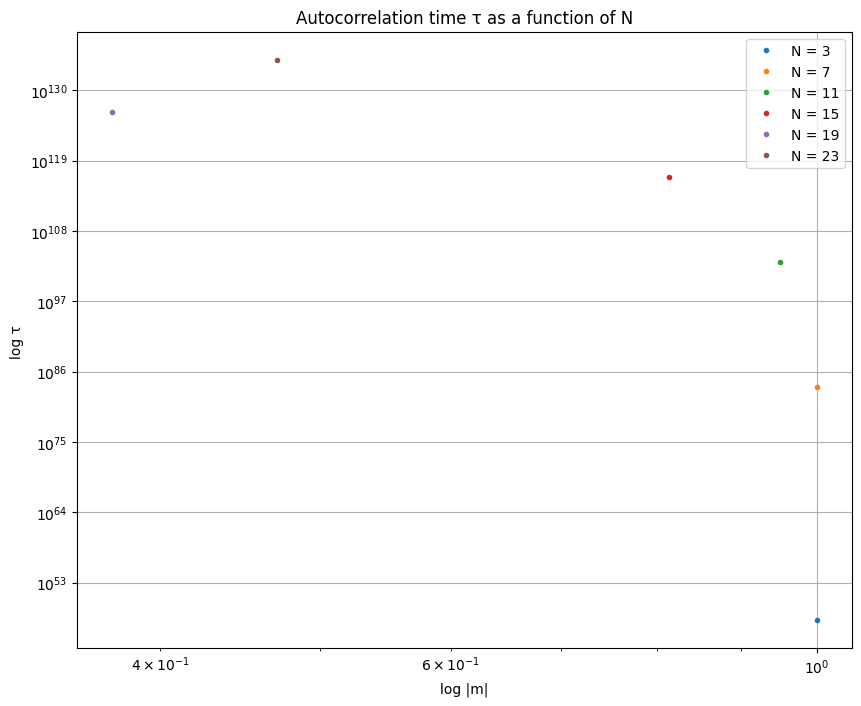

In [63]:
# Now plotting the required variables

J = 0.5     # Keeping J fixed at a certain value > J_c
h = 0

# We are supposed to take different values of N (N_x = N_y), so we define as follows:

mag_3  = [variables(3,J,h,"m_absolute")]
mag_7  = [variables(7,J,h,"m_absolute")]
mag_11 = [variables(11,J,h,"m_absolute")]
mag_15 = [variables(15,J,h,"m_absolute")]
mag_19 = [variables(19,J,h,"m_absolute")]
mag_23 = [variables(23,J,h,"m_absolute")]

# For different values of N:

plt.figure(figsize=(10,8))
plt.title("Autocorrelation time τ as a function of N",fontsize=12)
plt.grid()
plt.ylabel("log τ ")
plt.xlabel("log |m|")
plt.loglog(mag_3, tau_int3,'.', mag_7, tau_int7,'.', mag_11,tau_int11,'.', mag_15, tau_int15,'.', mag_19, tau_int19,'.', mag_23, tau_int23,'.')
plt.legend(("N = 3", "N = 7","N = 11","N = 15","N = 19","N = 23"))
plt.show()
    

### Answer 5 : Dynamical variable